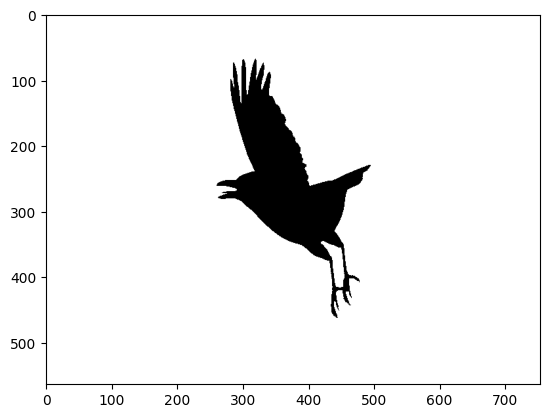

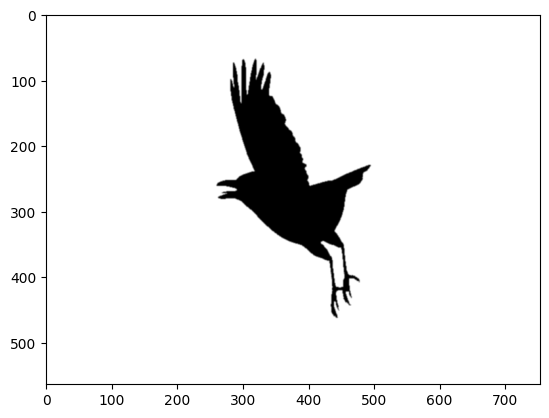

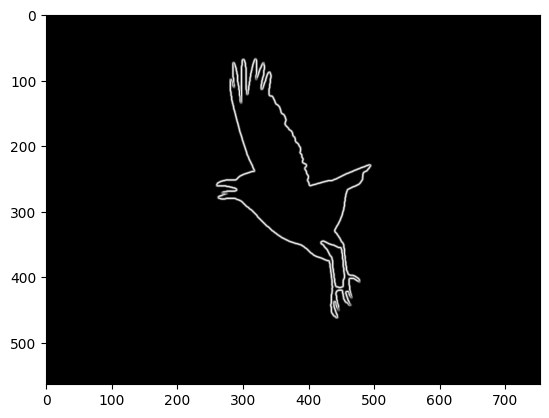

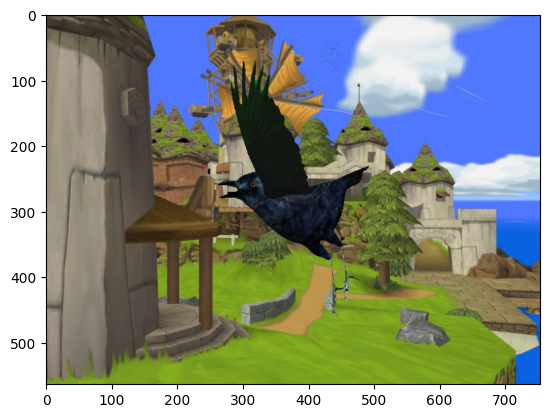

In [211]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('corvo.bmp')
background_image = cv2.imread('background.bmp')

image = cv2.resize(image, (background_image.shape[1], background_image.shape[0]))

image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Binarizacao
lower_green = np.array([0, 140, 0])
upper_green = np.array([100, 255, 100])
mask = cv2.inRange(image_copy, lower_green, upper_green)
plt.imshow(mask, cmap='gray')
plt.show()

# Gauss
mask = cv2.GaussianBlur(mask, (3, 3), 0)
plt.imshow(mask, cmap='gray')
plt.show()

# Sobel
sobelx = cv2.Sobel(mask, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(mask, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobelx**2 + sobely**2)
plt.imshow(sobel, cmap='gray')
plt.show()

masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]

background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
crop_background = background_image[0:image_copy.shape[0], 0:image_copy.shape[1]]
crop_background[mask == 0] = [0, 0, 0]

final_image = crop_background + masked_image
plt.imshow(final_image)
plt.show()